In [116]:
# Lets import the necessary dependencies or libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Load Data

In [117]:
filelist = os.listdir('Sales_Data')

In [118]:
for each_file in filelist:
    print(each_file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
combined.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [119]:
# declaring path in a variable
path = 'Sales_Data'

In [120]:
# lets create a data frame object

df = pd.DataFrame()
df.shape

(0, 0)

In [121]:
# lets see the shape of every csv files
for each_file in filelist:
    monthlyData = pd.read_csv(path+"/"+each_file)
    print(monthlyData.shape)

(25117, 6)
(18383, 6)
(12036, 6)
(15226, 6)
(12011, 6)
(16635, 6)
(17661, 6)
(20379, 6)
(9723, 6)
(186850, 6)
(11686, 6)
(14371, 6)
(13622, 6)


In [122]:
# lets combine all
for each_file in filelist:
    monthlyData = pd.read_csv(path+"/"+each_file)
    df = pd.concat([df, monthlyData])

In [123]:
df.to_csv('Sales_Data/combined.csv', index=False)

In [124]:
# Now lets check the size of dataframe
df.shape

(373700, 6)

In [125]:
# Lets see the first few rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [126]:
# Lets check the types of data
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Data Pre-processing

In [127]:
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [128]:
new_dataset = df.dropna(how="all")

In [129]:
new_dataset.shape

(372610, 6)

In [130]:
new_dataset['Price Each'].unique()

array(['1700', '600.0', '11.95', '149.99', '3.84', '99.99', '2.99',
       '999.99', '14.95', '600', '11.99', '150', '400', '700', '109.99',
       '379.99', '300', '389.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [131]:
new_dataset['Order ID'].unique()

array(['295665', '295666', '295667', ..., '222907', '222908', '222909'],
      dtype=object)

In [132]:
new_dataset['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
      dtype=object)

In [133]:
latest_dataset = new_dataset[new_dataset['Price Each'] != 'Price Each']

In [134]:
latest_dataset['Price Each'] = latest_dataset['Price Each'].astype(float)

/var/folders/lp/3_kngxhj5s15kvw79j282szr0000gn/T/ipykernel_6912/2604884663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_dataset['Price Each'] = latest_dataset['Price Each'].astype(float)


In [135]:
latest_dataset.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [136]:
latest_dataset = latest_dataset[latest_dataset['Quantity Ordered'] != 'Quantity Ordered']

In [137]:
latest_dataset['Quantity Ordered'] = latest_dataset['Quantity Ordered'].astype(int)

In [138]:
latest_dataset.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [139]:
latest_dataset['Order ID'] = latest_dataset['Order ID'].astype(int)

In [140]:
latest_dataset.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [141]:
## Creating a function

def month(x):
    return x.split('/')[0]

In [142]:
latest_dataset['Month'] = latest_dataset['Order Date'].apply(month)

In [143]:
latest_dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [144]:
latest_dataset['Month'] = latest_dataset['Month'].astype(int)

In [145]:
latest_dataset.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

## Monthly Data Analysis

In [146]:
latest_dataset['Sales'] = round(latest_dataset['Quantity Ordered']*latest_dataset['Price Each'])

In [147]:
latest_dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12.0
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,150.0
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,12.0


In [151]:
latest_dataset.groupby('Month')['Sales'].sum()

Month
1     3645272.0
2     4404994.0
3     5615394.0
4     6782806.0
5     6306508.0
6     5156704.0
7     5296686.0
8     4489886.0
9     4196062.0
10    7475052.0
11    6400598.0
12    9228864.0
Name: Sales, dtype: float64

## Now Show Time.... 8)

<BarContainer object of 12 artists>

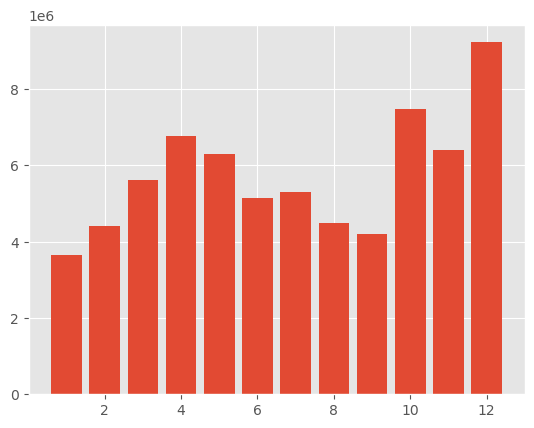

In [155]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month,latest_dataset.groupby('Month')['Sales'].sum())